In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

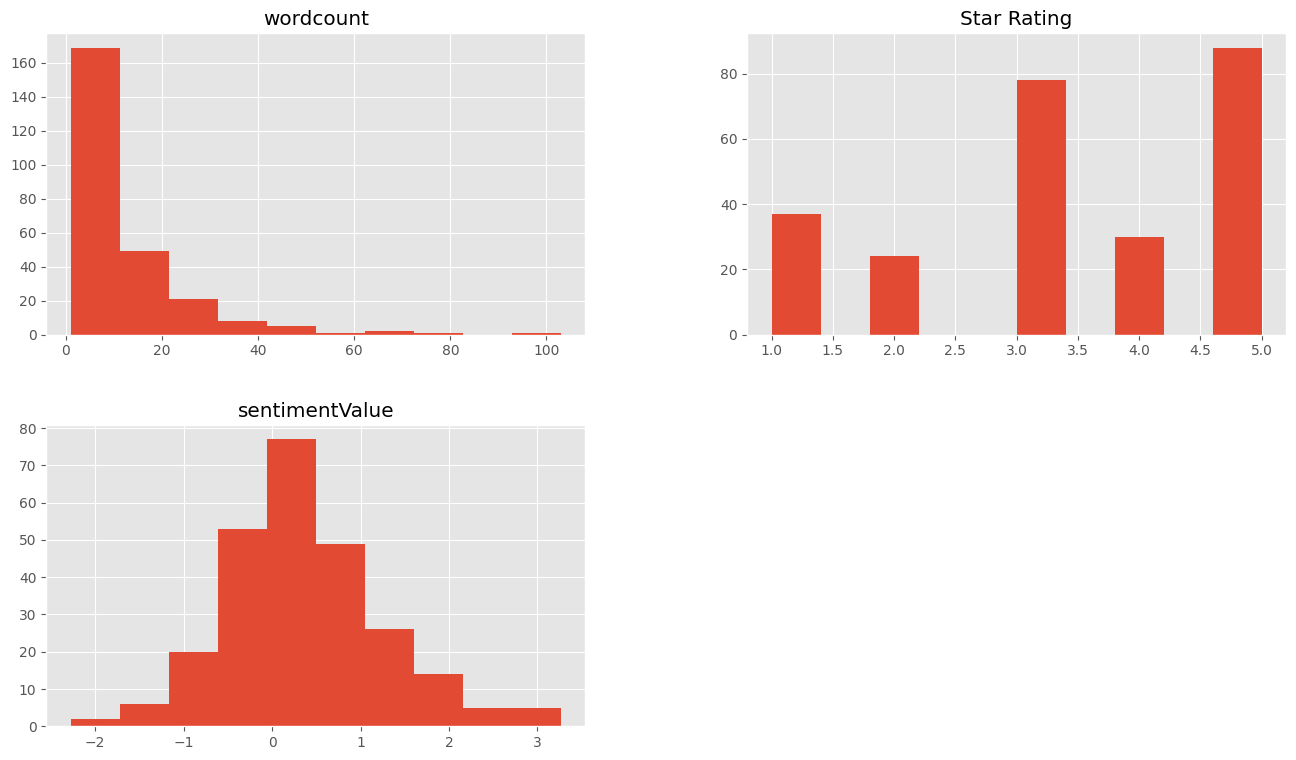

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


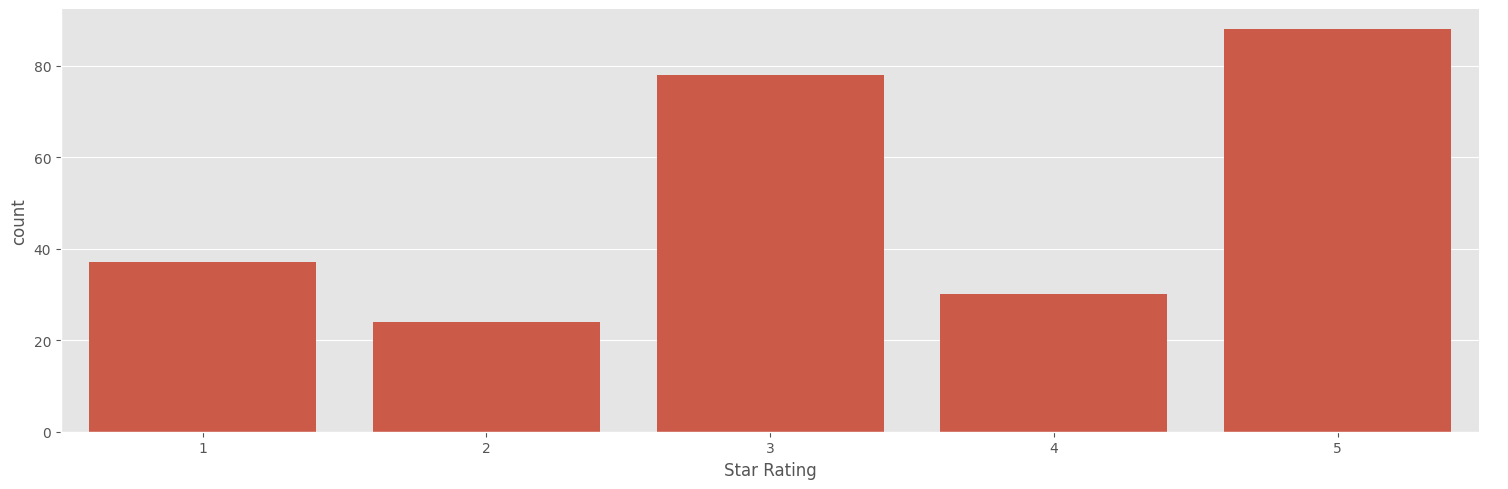

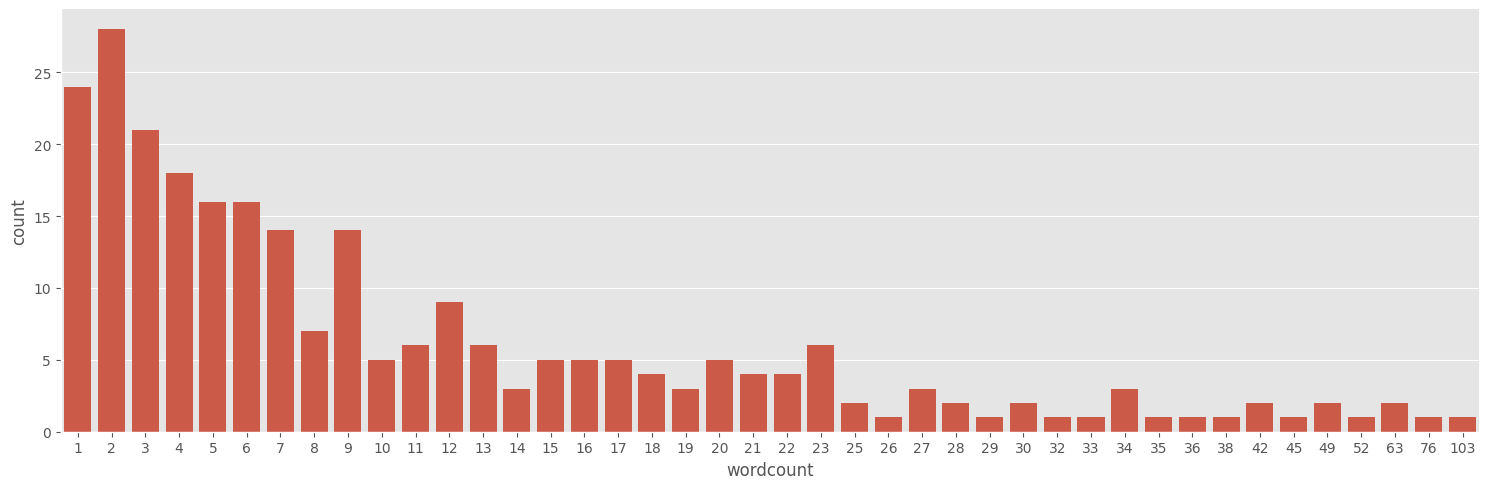

In [4]:
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)
dataframe.describe()
dataframe.hist()
plt.show()
print(dataframe.groupby('Star Rating').size())
sb.catplot(x='Star Rating',data=dataframe,kind="count", aspect=3)
sb.catplot(x='wordcount',data=dataframe,kind="count", aspect=3)


Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86
[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



NameError: name 'weights' is not defined

C:\Users\Elizondo Jaral\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


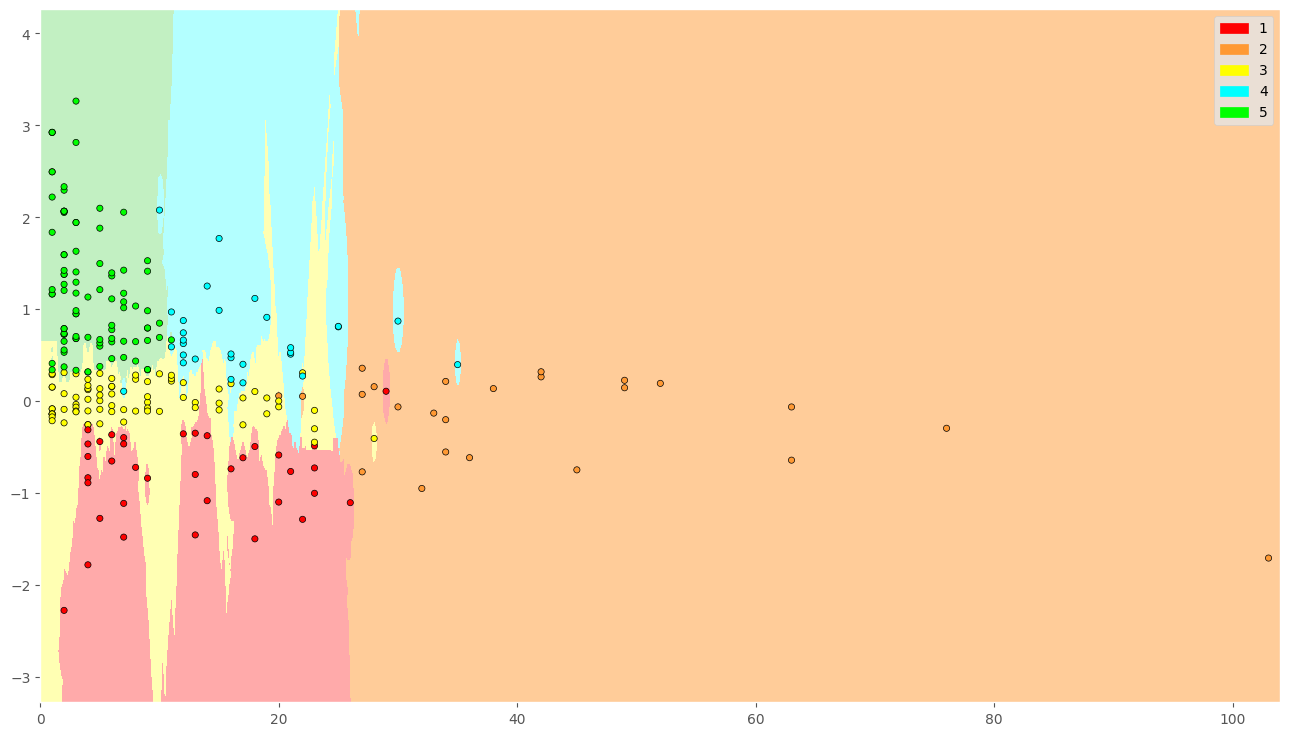

In [6]:
#Preparamos las entradas
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

h = .02 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

plt.title("5-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.show()


[5]
[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


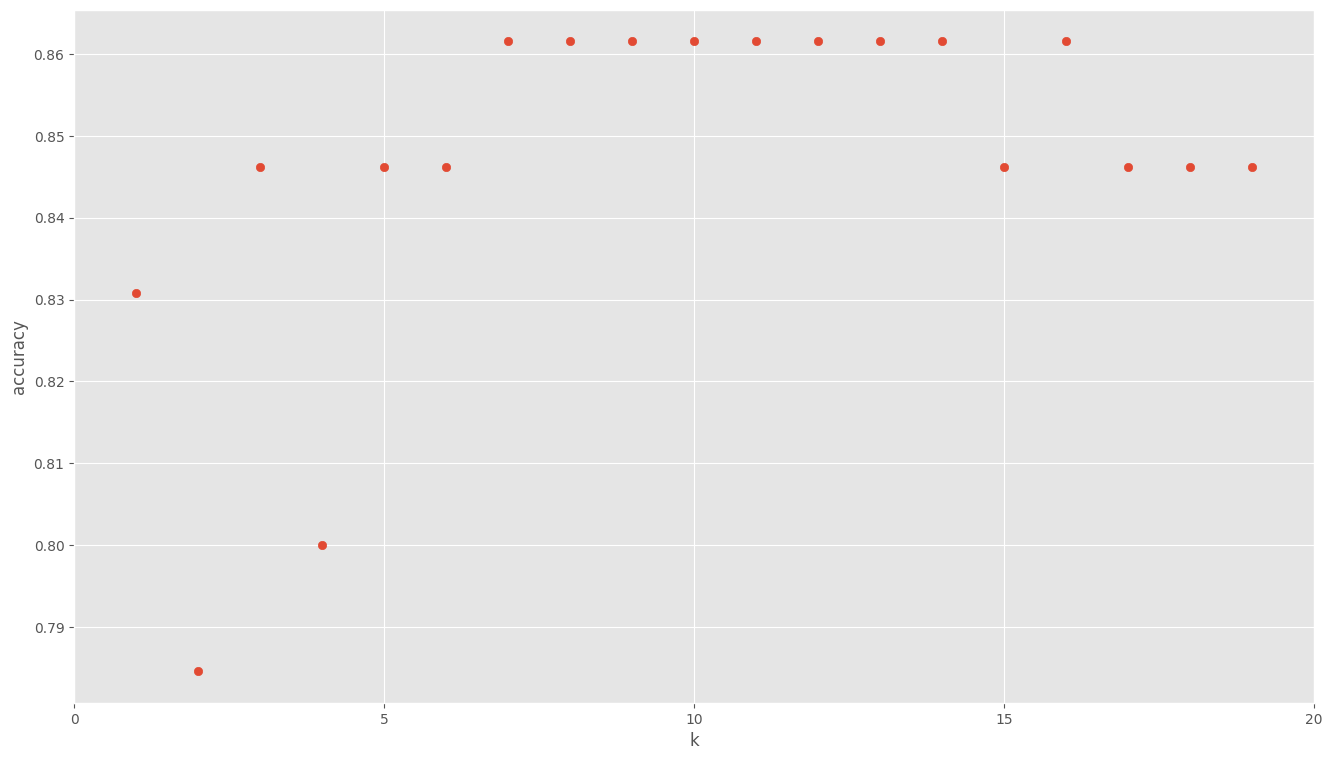

In [7]:
#ELEGIR EL MEJOR VALOR DE K
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

#CLASIFICAR O PREDECIR NUEVAS MUESTRAS
print(clf.predict([[5, 1.0]]))
print(clf.predict_proba([[20, 0.0]]))
